In [1]:
#include autoreload modules for fast testing and update
%load_ext autoreload
%autoreload 2

#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sbn
import time
import matplotlib.dates as mdates
import ast

#import modules
from src.data.helper_closed_transactions import read_epex_file, filter_lead_time, extract_transactions
from src.visualization.visualize_transactions import executed_transactions_bar_chart, executed_transactions_heatmap_summary, executed_transactions_time_series


from src.data.bid_ask_spread import hourly_bid_ask_spread, update_prices_closed_transactions, hourly_bid_ask_spread_depth
from src.visualization.visualize_bid_ask_spread import hourly_bid_ask_spread_plot, hourly_bid_ask_spread_plot_comparison

#set maximum columns display pandas
pd.options.display.max_columns = 50

In [2]:
from src.data.welfare import read_NTC_file, NTC_preparation


In [3]:
NTC = read_NTC_file("../data/external/NTC_DEandCH_2019.csv")
NTC = NTC_preparation(NTC)

/Users/gianlucamancini/Documents/eth_codes/case_study/case_study_2_alpiq/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [48]:
NTC.head()

,Date from,Time from,Time to,CH to DE_Utilized capacity (MW),CH to DE_Actual value (MW),De to CH_Utilized capacity (MW),DE to CH_Actual value (MW),Intraday has taken place,Time from hour,Time from min,start_time,Time to hour,Time to min,end_time,CH to DE_Actual value (MW) update
0,2019-01-01 00:00:00+00:00,00:00,00:15,4800,0,0,800,Yes,0,0,2019-01-01 00:00:00+00:00,0,15,2019-01-01 00:15:00+00:00,0
1,2019-01-01 00:00:00+00:00,00:15,00:30,4800,0,0,800,Yes,0,15,2019-01-01 00:15:00+00:00,0,30,2019-01-01 00:30:00+00:00,0
2,2019-01-01 00:00:00+00:00,00:30,00:45,4800,0,0,800,Yes,0,30,2019-01-01 00:30:00+00:00,0,45,2019-01-01 00:45:00+00:00,0
3,2019-01-01 00:00:00+00:00,00:45,01:00,4800,0,0,800,Yes,0,45,2019-01-01 00:45:00+00:00,1,0,2019-01-01 01:00:00+00:00,0
4,2019-01-01 00:00:00+00:00,01:00,01:15,4800,0,0,800,Yes,1,0,2019-01-01 01:00:00+00:00,1,15,2019-01-01 01:15:00+00:00,0


Obtained 3 months statistics

In [2]:
df_summary=pd.read_csv('../data/processed/summary_analysis_window_interest_2019_14-03-2021 21:00:40/2019_14-03-2021 21:00:40_summary.csv')

In [28]:
df_summary.head()

,time,Avg Historical Price,Max Historical Price,Avg a Posteriori Price,Max a Posteriori Price,Total Volume Traded,Total Volume Traded CH-DE,CH-DE Revenue Max,CH-DE Revenue Min,Number of Contracts Closed,Additional Contracts Closed,Hours Count,Hours Match Count
0,2019-03-22,40.317296,200.00,39.045521,150.48,5070.800,750.200,38398.64925,32872.666195,8309,1325,"{21: 796, 18: 755, 12: 480, 11: 475, 10: 450, ...","{18: 385, 8: 268, 7: 218, 17: 166, 6: 142, 19:..."
1,2019-03-23,37.650317,148.20,37.601254,148.20,7470.775,75.875,3594.81600,3324.731468,10585,172,"{14: 1861, 16: 699, 12: 644, 10: 570, 21: 504,...",{19: 172}
2,2019-03-24,25.541989,123.01,25.539983,123.01,5229.850,5.325,240.70525,233.333708,9080,7,"{12: 1311, 10: 496, 19: 483, 15: 456, 17: 451,...","{16: 4, 9: 2, 11: 1}"
3,2019-03-25,29.611165,190.04,29.138533,190.04,5834.525,446.150,22337.70375,18768.097547,8930,598,"{16: 784, 15: 641, 14: 634, 13: 565, 18: 557, ...","{18: 338, 19: 210, 17: 50}"
4,2019-03-26,35.757800,200.00,35.673183,200.00,6785.950,189.925,8647.02450,7989.534745,10125,282,"{9: 943, 12: 889, 11: 755, 10: 699, 16: 556, 1...","{19: 182, 18: 71, 17: 26, 9: 3}"


In [34]:
df_summary['Additional Contracts Closed'].sum()

281529

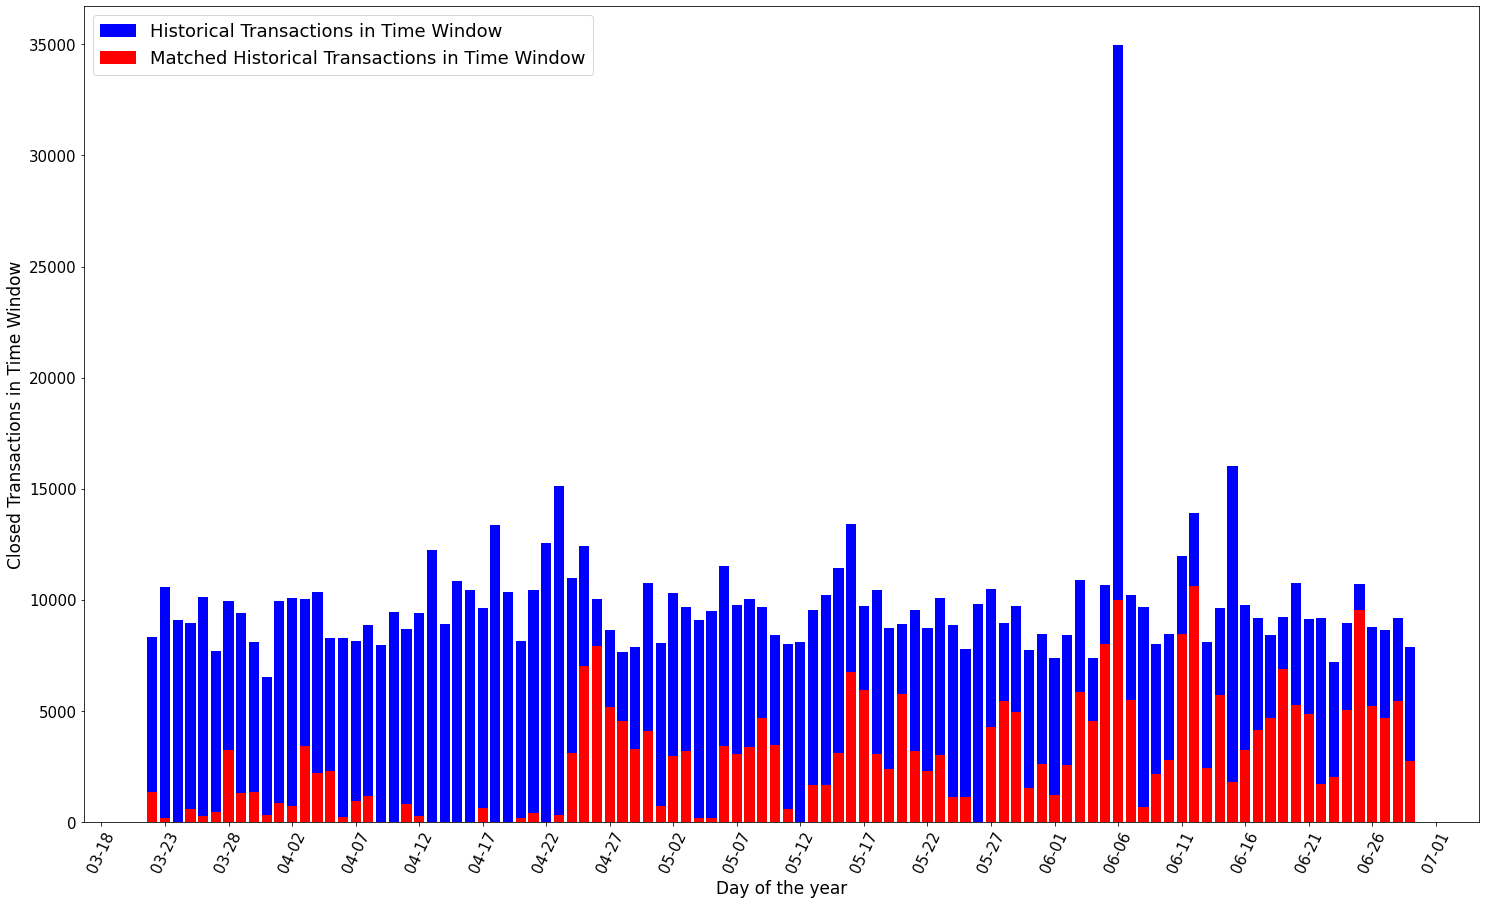

In [80]:
# plot
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['Number of Contracts Closed'],
       color='blue',
       label='Historical Transactions in Time Window')

ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['Additional Contracts Closed'],
       color='red',
       label='Matched Historical Transactions in Time Window')

ax.set_xlabel('Day of the year', size=17)
ax.set_ylabel('Closed Transactions in Time Window', size=17)


ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)

ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

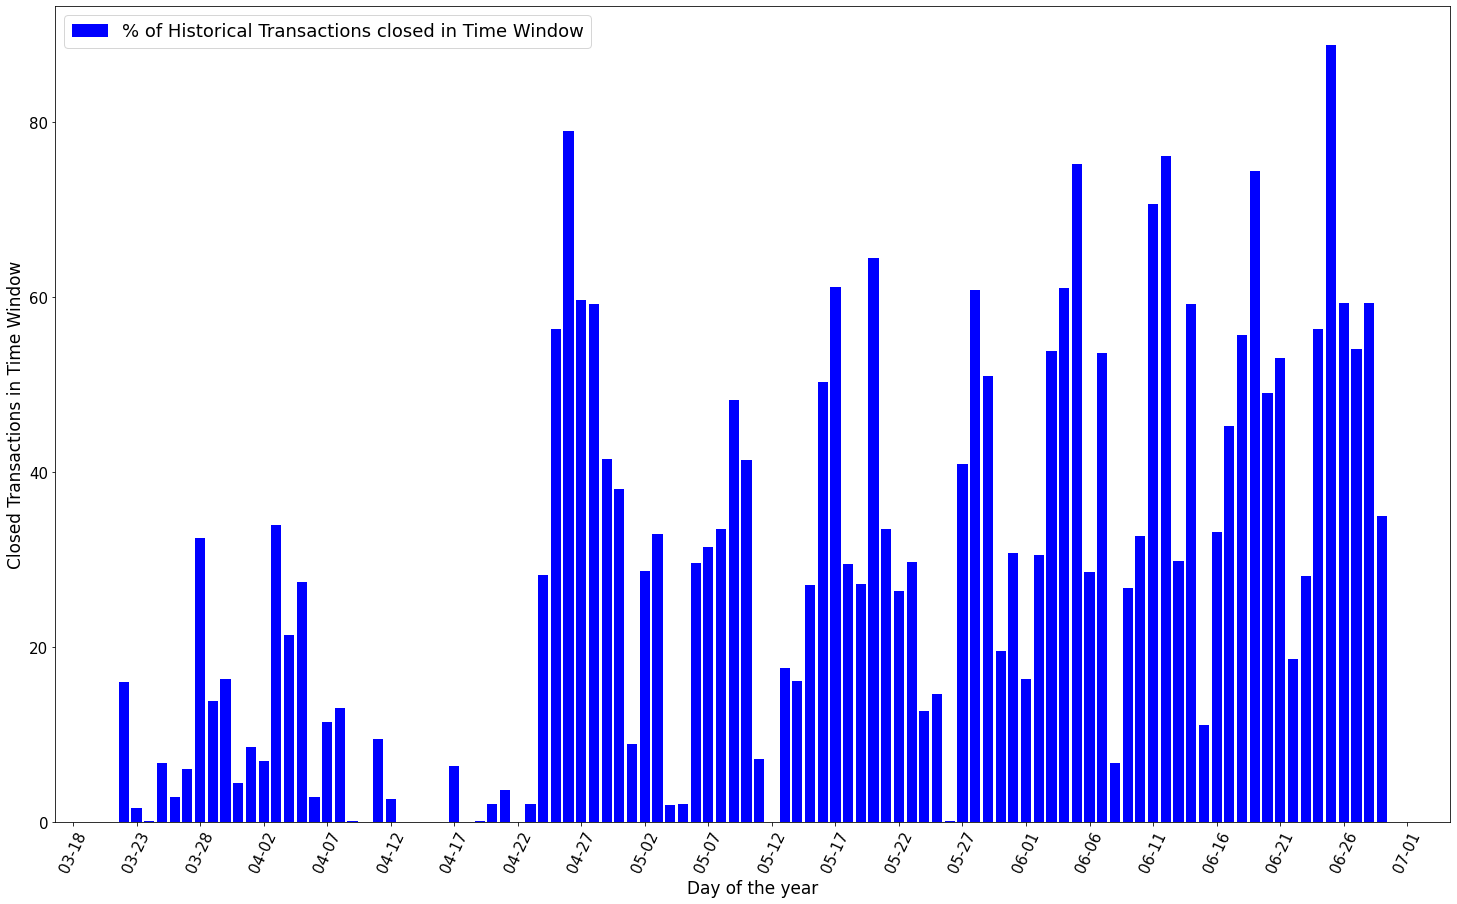

In [81]:
# plot
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['Additional Contracts Closed']*100/df_summary['Number of Contracts Closed'],
       color='blue',
       label='% of Historical Transactions closed in Time Window')

ax.set_xlabel('Day of the year', size=17)
ax.set_ylabel('Closed Transactions in Time Window', size=17)
ax.legend()

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)

ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

Plot CH-DE revenues and difference is the German market welfare gain

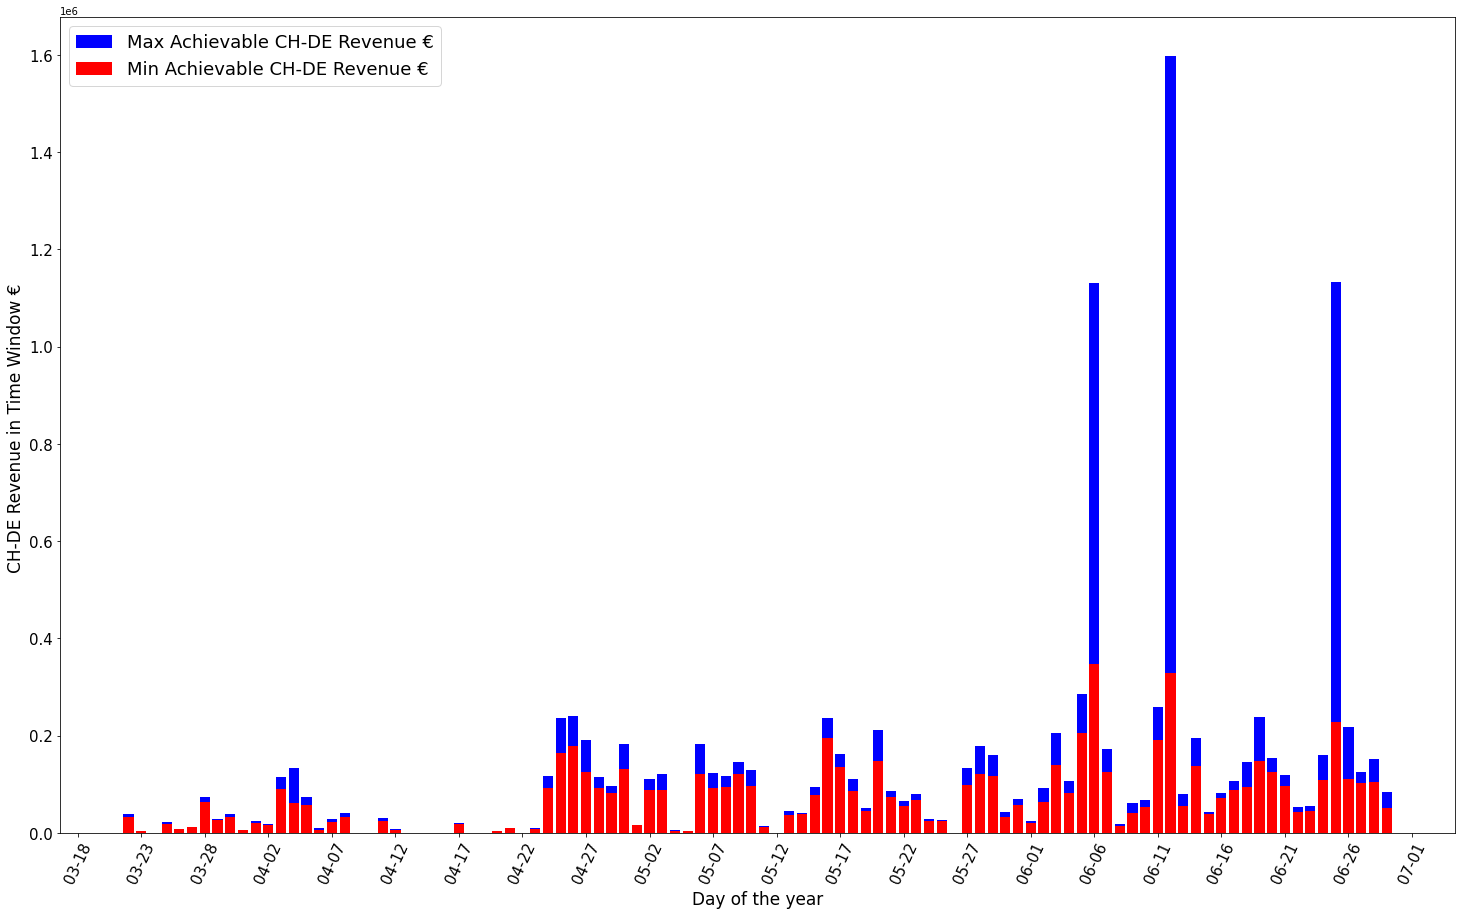

In [84]:
# plot
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(pd.to_datetime(df_summary['time']), 
       df_summary['CH-DE Revenue Max'], 
       color='blue',
       label='Max Achievable CH-DE Revenue €')

ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['CH-DE Revenue Min'], 
       color='red',
       label='Min Achievable CH-DE Revenue €')

ax.set_xlabel('Day of the year', size=17)
ax.set_ylabel('CH-DE Revenue in Time Window € ', size=17)
ax.legend()

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)

ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

Volumes of transactions

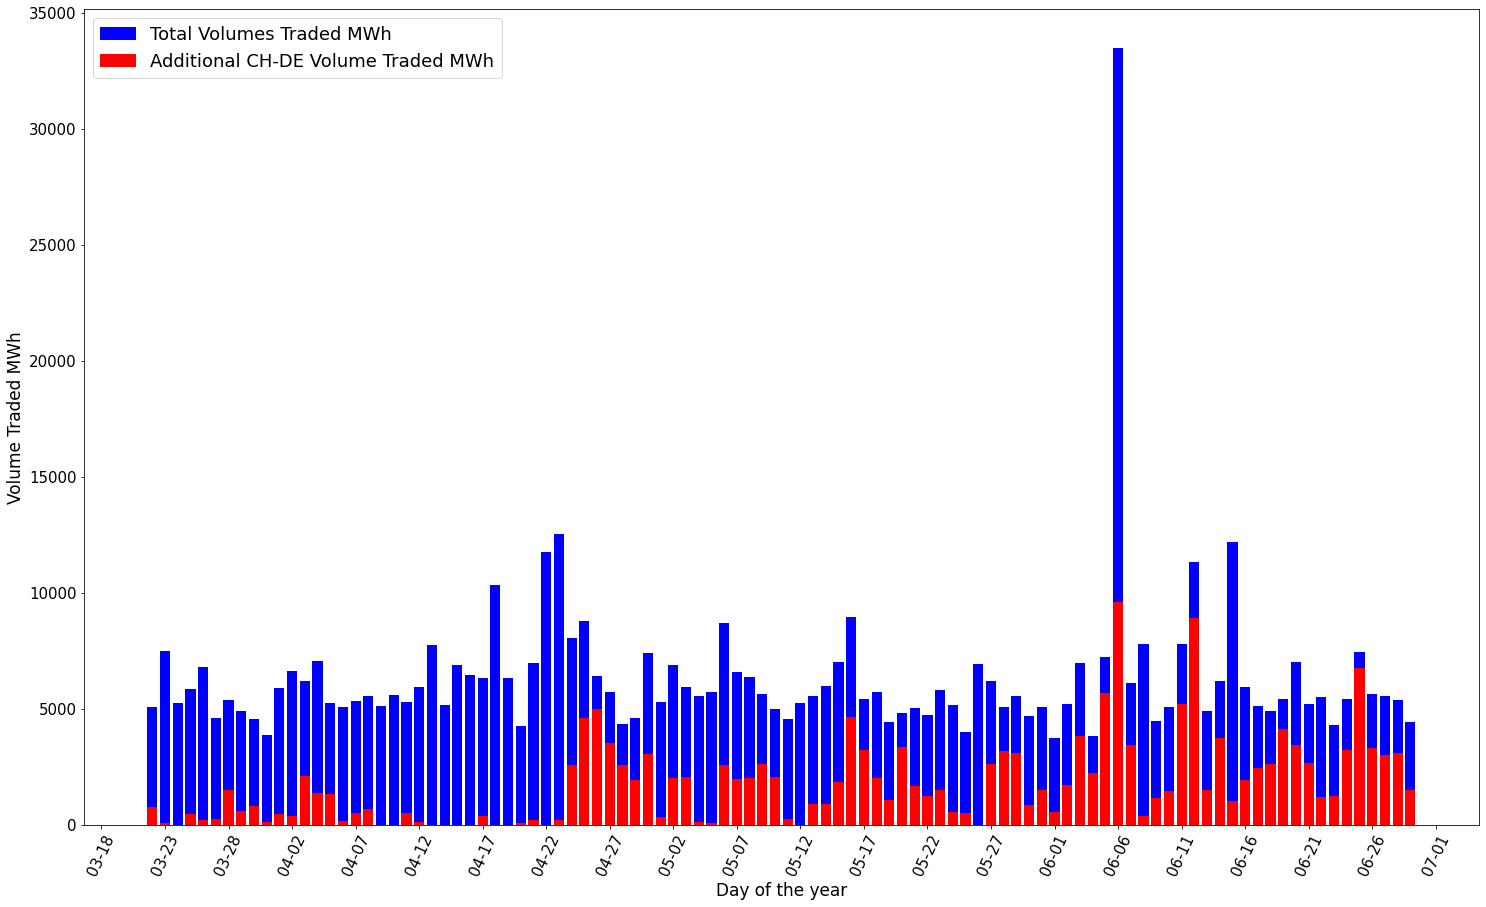

In [3]:
# plot
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(pd.to_datetime(df_summary['time']), 
       df_summary['Total Volume Traded'], 
       color='blue',
       label='Total Volumes Traded MWh')

ax.bar(pd.to_datetime(df_summary['time']),
       df_summary['Total Volume Traded CH-DE'], 
       color='red',
       label='Additional CH-DE Volume Traded MWh')

ax.set_xlabel('Day of the year', size=17)
ax.set_ylabel('Volume Traded MWh', size=17)
ax.legend()

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)

ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

In [5]:
df_summary['Total Volume Traded'].sum()

633933.1750000002

In [11]:
df_summary['Total Volume Traded CH-DE'].mean()

1785.025

In [9]:
df_summary.head(40)

,time,Avg Historical Price,Max Historical Price,Avg a Posteriori Price,Max a Posteriori Price,Total Volume Traded,Total Volume Traded CH-DE,CH-DE Revenue Max,CH-DE Revenue Min,Number of Contracts Closed,Additional Contracts Closed,Hours Count,Hours Match Count
0,2019-03-22,40.317296,200.00,39.045521,150.480000,5070.800,750.200,38398.64925,32872.666195,8309,1325,"{21: 796, 18: 755, 12: 480, 11: 475, 10: 450, ...","{18: 385, 8: 268, 7: 218, 17: 166, 6: 142, 19:..."
1,2019-03-23,37.650317,148.20,37.601254,148.200000,7470.775,75.875,3594.81600,3324.731468,10585,172,"{14: 1861, 16: 699, 12: 644, 10: 570, 21: 504,...",{19: 172}
2,2019-03-24,25.541989,123.01,25.539983,123.010000,5229.850,5.325,240.70525,233.333708,9080,7,"{12: 1311, 10: 496, 19: 483, 15: 456, 17: 451,...","{16: 4, 9: 2, 11: 1}"
3,2019-03-25,29.611165,190.04,29.138533,190.040000,5834.525,446.150,22337.70375,18768.097547,8930,598,"{16: 784, 15: 641, 14: 634, 13: 565, 18: 557, ...","{18: 338, 19: 210, 17: 50}"
4,2019-03-26,35.757800,200.00,35.673183,200.000000,6785.950,189.925,8647.02450,7989.534745,10125,282,"{9: 943, 12: 889, 11: 755, 10: 699, 16: 556, 1...","{19: 182, 18: 71, 17: 26, 9: 3}"
5,2019-03-27,37.399330,200.00,37.070287,200.000000,4597.675,271.200,12881.35000,11408.512954,7684,460,"{10: 580, 11: 542, 13: 461, 9: 454, 17: 412, 8...","{18: 215, 20: 163, 17: 82}"
6,2019-03-28,40.414919,149.85,38.228034,149.850000,5398.875,1493.325,73175.60050,62819.386459,9960,3236,"{14: 1133, 10: 791, 11: 548, 9: 527, 8: 518, 1...","{14: 616, 15: 356, 16: 302, 19: 268, 17: 259, ..."
7,2019-03-29,33.843756,85.37,33.106373,85.370000,4912.400,605.075,28746.89825,25453.561858,9379,1298,"{14: 574, 15: 543, 13: 511, 17: 509, 8: 489, 9...","{18: 293, 19: 280, 20: 258, 21: 137, 7: 107, 1..."
8,2019-03-30,36.409001,188.81,35.216727,188.810000,4552.450,793.350,39127.54075,33373.686403,8081,1320,"{16: 558, 15: 536, 10: 531, 9: 457, 17: 424, 2...","{20: 387, 18: 359, 19: 294, 21: 280}"
9,2019-03-31,21.042297,150.00,20.863105,150.000000,3849.750,130.550,5989.68025,5491.819197,6534,290,"{17: 474, 0: 466, 18: 426, 1: 420, 14: 397, 20...","{19: 184, 18: 104, 17: 1, 15: 1}"


Hours contracts closed distribution

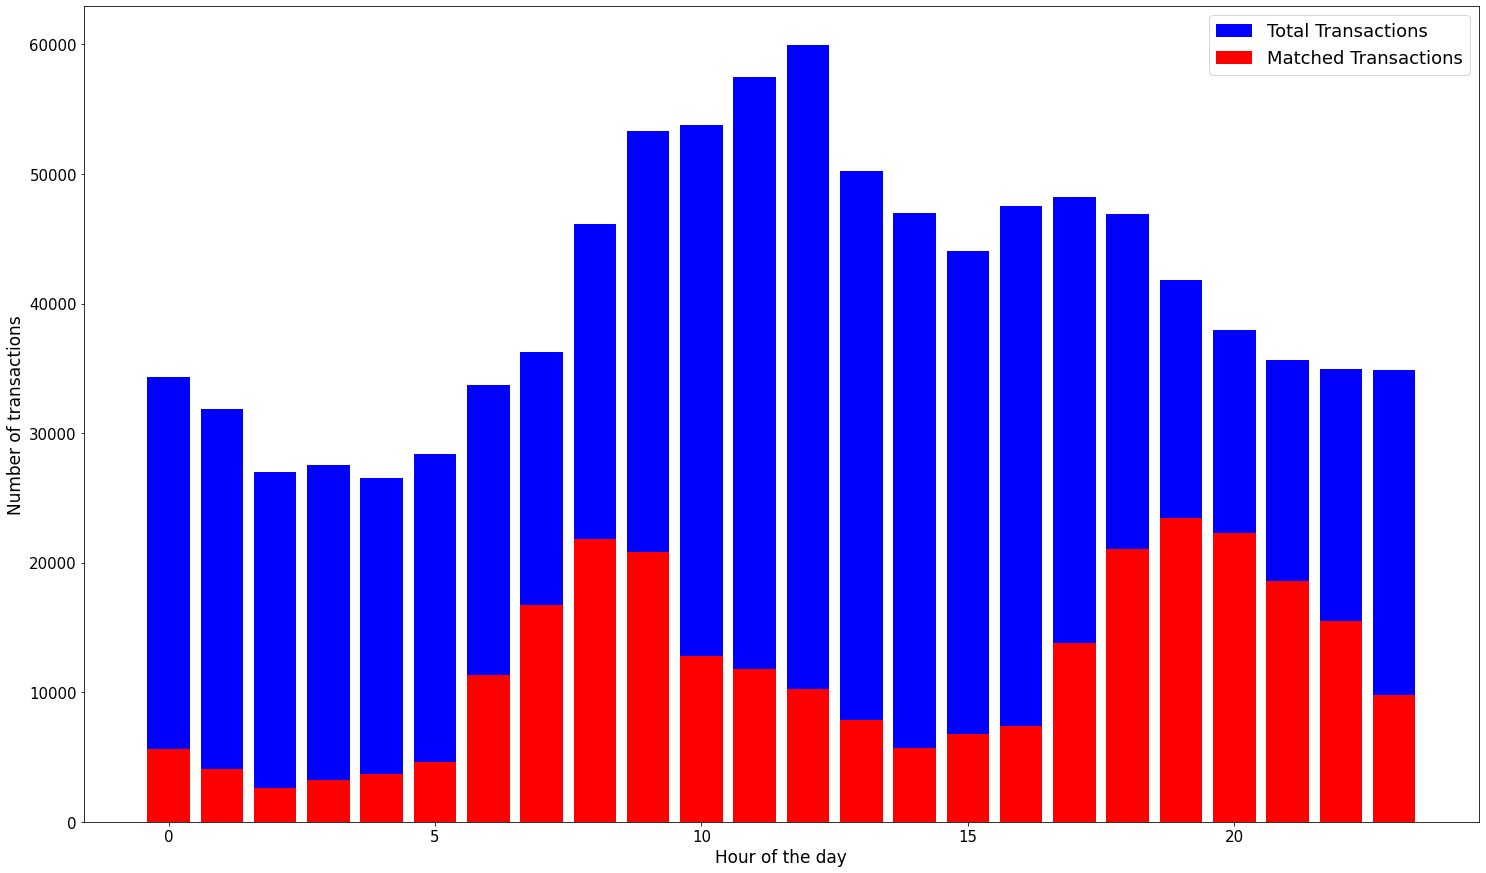

In [137]:
for i in range(df_summary['Hours Count'].shape[0]):
    
    if i==0:
        
        a= ast.literal_eval(df_summary['Hours Count'].iloc[i])  
        
    if i>0:
        
        b=ast.literal_eval(df_summary['Hours Count'].iloc[i])
        
        a={k: a.get(k, 0) + b.get(k, 0) for k in set(a) | set(b)}
        
for i in range(df_summary['Hours Match Count'].shape[0]):
    
    if i==0:
        
        c= ast.literal_eval(df_summary['Hours Match Count'].iloc[i])  
        
    if i>0:
        
        z=ast.literal_eval(df_summary['Hours Match Count'].iloc[i])
        
        c={k: c.get(k, 0) + z.get(k, 0) for k in set(c) | set(z)}

#plot
fig, ax = plt.subplots(figsize=(25, 15))
ax.bar(a.keys(), 
       a.values(), 
       color='blue',
       label='Total Transactions')

ax.bar(c.keys(), 
       c.values(), 
       color='red',
       label='Matched Transactions')


ax.set_xlabel('Hour of the day', size=17)
ax.set_ylabel('Number of transactions', size=17)
ax.legend()

ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

Prices

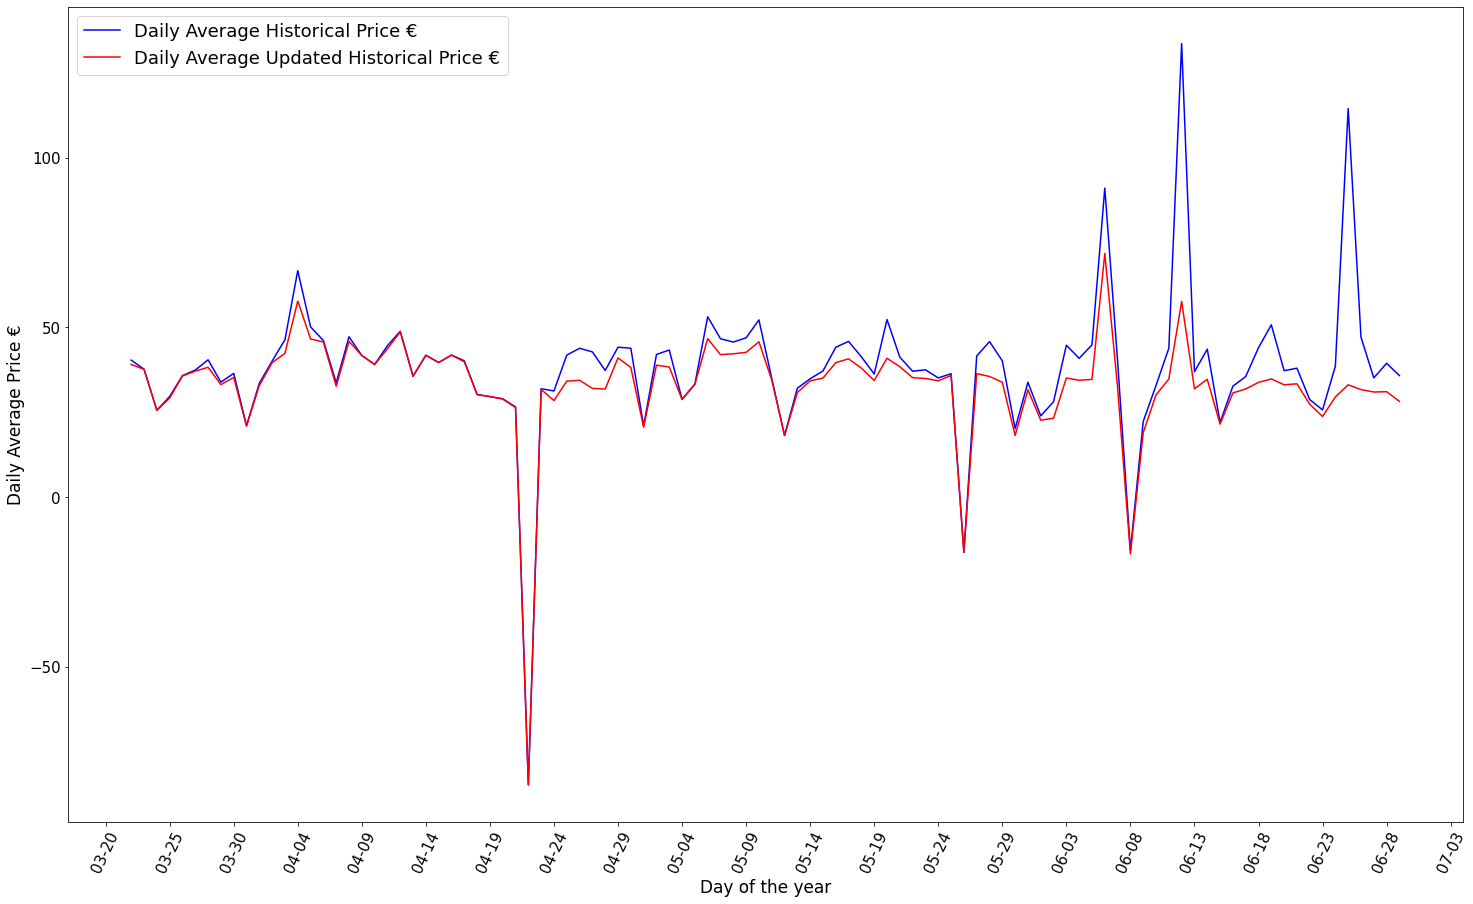

In [145]:
# plot
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Avg Historical Price'], 
       color='blue',
       label='Daily Average Historical Price €')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Avg a Posteriori Price'], 
       color='red',
       label='Daily Average Updated Historical Price €')

ax.set_xlabel('Day of the year', size=17)
ax.set_ylabel('Daily Average Price €', size=17)
ax.legend()

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)

ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

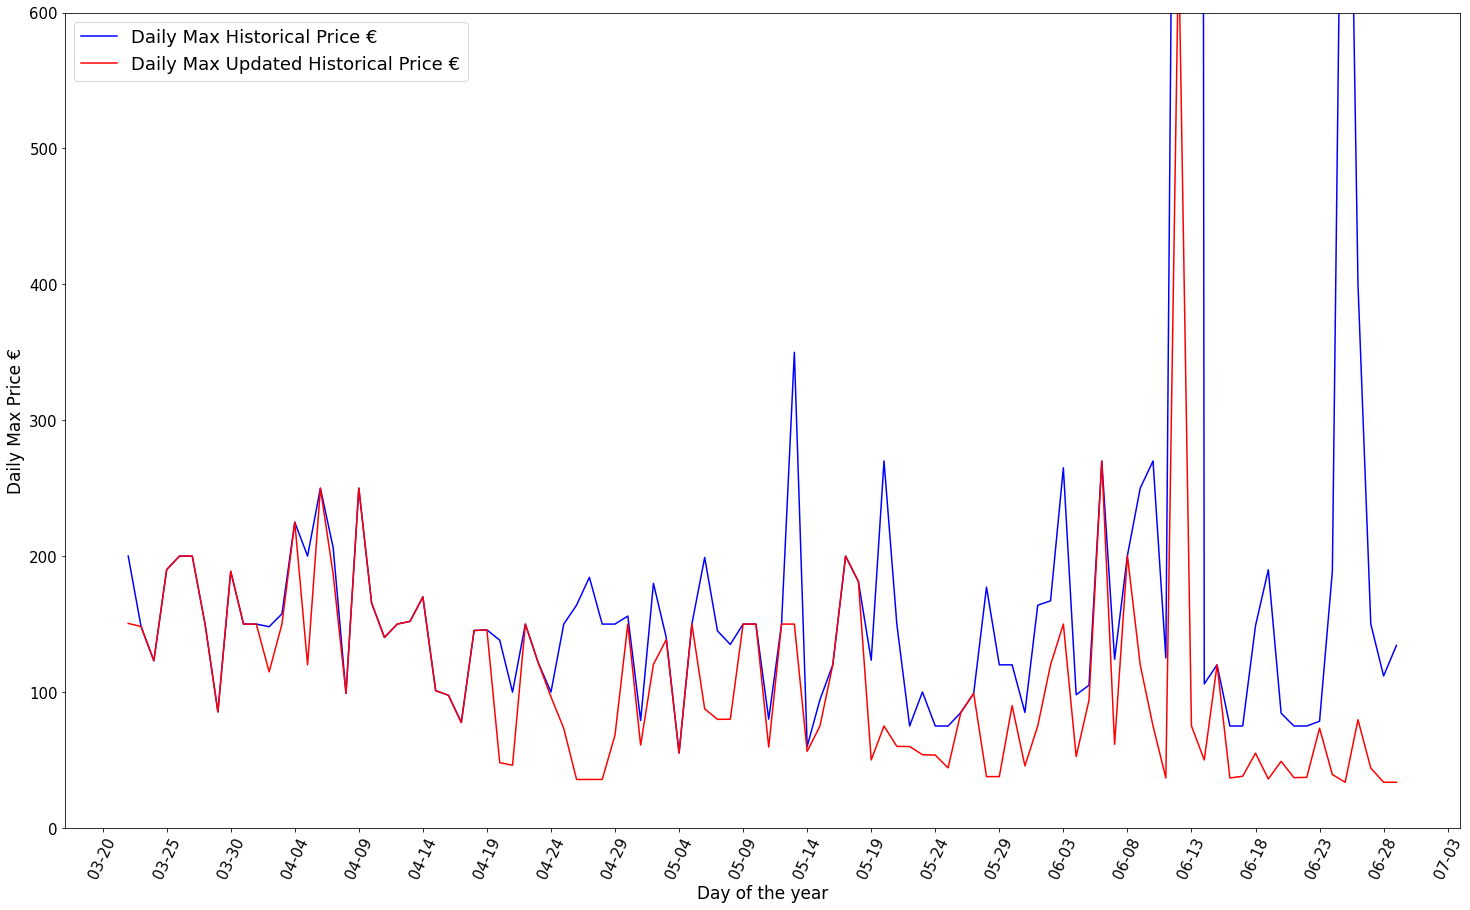

In [147]:
# plot
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%m-%d')
    
    
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(pd.to_datetime(df_summary['time']), 
       df_summary['Max Historical Price'], 
       color='blue',
       label='Daily Max Historical Price €')

ax.plot(pd.to_datetime(df_summary['time']),
       df_summary['Max a Posteriori Price'], 
       color='red',
       label='Daily Max Updated Historical Price €')

ax.set_xlabel('Day of the year', size=17)
ax.set_ylabel('Daily Max Price €', size=17)
ax.legend()

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.xaxis.set_tick_params(rotation=65)

ax.set_ylim([0,600])
ax.legend(fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

Load the daily data

In [3]:
df=read_epex_file(
    "../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-04/DE Continuous Orders 20190426.csv")


In [4]:
transactions=pd.read_csv('../data/interim/EPEX_spot_continous_baseline_pipeline_2019_14-03-2021 21:00:40/2019-04/Transactions/DE_20190426.csv')


In [16]:
transactions_update=pd.read_csv('../data/processed/EPEX_spot_continous_baseline_pipeline_2019_14-03-2021 21:00:40/2019-04/Updated Transactions/DE_20190426.csv')



In [17]:

mask = transactions_update['match_binary_outcome'] == 1
df_transactions=transactions_update[mask]



In [18]:
times = pd.to_datetime(df_transactions['End Validity Date'])

In [24]:
gb=df_transactions['Executed Volume'].groupby(times.dt.hour)

In [35]:
d = {1: "one", 2: "three"}
d1 = {2: "two"}

# updates the value of key 2
d.update(d1)

In [36]:
d

{1: 'one', 2: 'two'}

In [34]:
gb.sum().sum()

5002.600000000001

In [37]:
transactions_update.head()

,index,End Validity Date,Executed Price & Volume,Delivery Start,Executed Volume,Execution Price,Initial ID_B,Instrument Type,Is Executed_B,Is block_B,Order ID_B,Parent ID_B,Price_B,Volume_B,index_B,lead_time_B,Initial ID_S,Is Executed_S,Is block_S,Order ID_S,Parent ID_S,Price_S,Volume_S,index_S,lead_time_S,weekly_hydro_marginal_price,possible_match,match_binary_outcome,A posteriori Execution Price
0,0,2019-04-25 23:15:10.149000+00:00,"(37.91, 0.1)",2019-04-26 00:15:00+00:00,0.100,37.91,10406607790,Quarter Hour,2,N,10406608858,1.040661e+10,37.91,0.250,48476,0 days 00:59:50.352000,10406608352,1,N,10406608867,1.040661e+10,37.9,0.100,48483,0 days 00:59:49.851000,35.651908,True,1,35.651908
1,2,2019-04-25 23:15:28.130000+00:00,"(37.91, 0.25)",2019-04-26 00:15:00+00:00,0.250,37.91,10406607790,Quarter Hour,1,N,10406608960,1.040661e+10,37.91,0.250,48548,0 days 00:59:45.198000,10406607641,2,N,10406609065,1.040661e+10,37.0,1.000,48639,0 days 00:59:31.870000,35.651908,True,1,35.651908
2,1,2019-04-25 23:15:28.130000+00:00,"(37.9, 0.275)",2019-04-26 00:15:00+00:00,0.275,37.90,10406608408,Quarter Hour,1,N,10406609000,1.040661e+10,37.90,0.275,48580,0 days 00:59:42.716000,10406607641,2,N,10406609065,1.040661e+10,37.0,0.750,48638,0 days 00:59:31.870000,35.651908,True,1,35.651908
3,3,2019-04-25 23:15:28.130000+00:00,"(37.92, 1.25)",2019-04-26 00:15:00+00:00,1.250,37.92,10406608999,Quarter Hour,1,N,10406608999,NaN,37.92,1.250,48579,0 days 00:59:42.777000,10406607641,2,N,10406609065,1.040661e+10,37.0,2.250,48642,0 days 00:59:31.870000,35.651908,True,1,35.651908
4,4,2019-04-25 23:15:28.399000+00:00,"(37.0, 0.125)",2019-04-26 00:15:00+00:00,0.125,37.00,10406609067,Quarter Hour,1,N,10406609067,NaN,37.91,0.125,48644,0 days 00:59:31.601000,10406607641,2,N,10406609065,1.040661e+10,37.0,0.475,48641,0 days 00:59:31.870000,35.651908,True,1,35.651908


Number of closed transactions in window of intereset before and after hydro inclusion

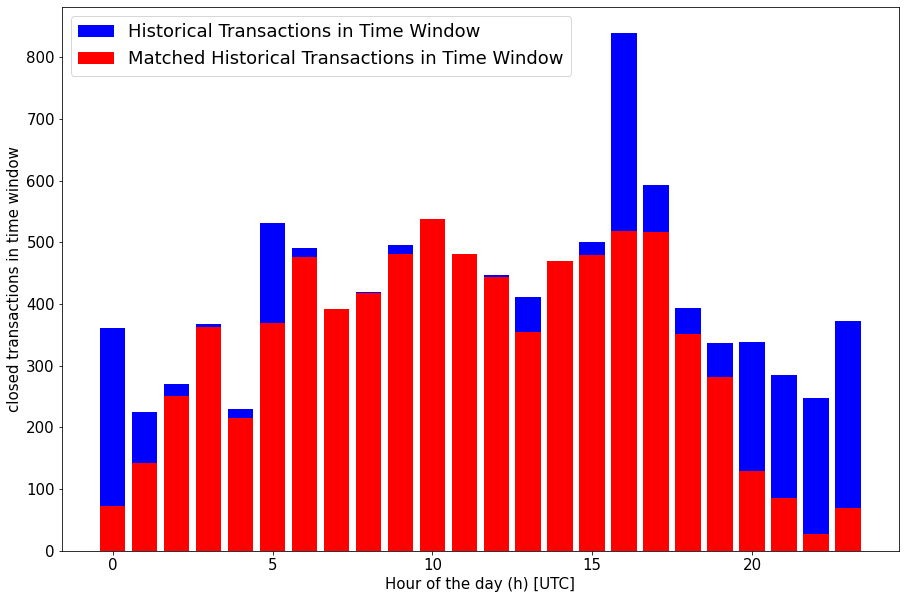

In [231]:
data_base, data_updated=executed_transactions_bar_chart(transactions_update, plot=True, return_updated_transactions=True)



Visualize heat map of prices variation in the window of interest before and after hydro inclusion. In this day a slight increase in the price can be noticed.

In [169]:
daily_execution_price_stat, daily_execution_volume_stat, daily_execution_price_stat_marginal=executed_transactions_heatmap_summary(transactions_update,
                                                                                                                                   plot=False,
                                                                                                                                   return_updated_transactions=False)




In [5]:
daily_execution_price_stat, daily_execution_volume_stat, daily_execution_price_stat_marginal=executed_transactions_heatmap_summary(transactions_update, plot=False, return_updated_transactions=True)



In [20]:
l=(daily_execution_price_stat_marginal-daily_execution_price_stat)/daily_execution_price_stat
perc_diff = l.style.format({
    'execution price 25%': '{:,.2%}'.format,
    'execution price 50%': '{:,.2%}'.format,
    'execution price 75%': '{:,.2%}'.format,
    'mean execution price': '{:,.2%}'.format,
    'min execution price': '{:,.2%}'.format,
    'max execution price': '{:,.2%}'.format,
})
type(perc_diff)

pandas.io.formats.style.Styler

In [43]:
l=[[1,2],[3,4]]
['{0:.2%}'.format(x) for y in l for x in y]

['100.00%', '200.00%', '300.00%', '400.00%']

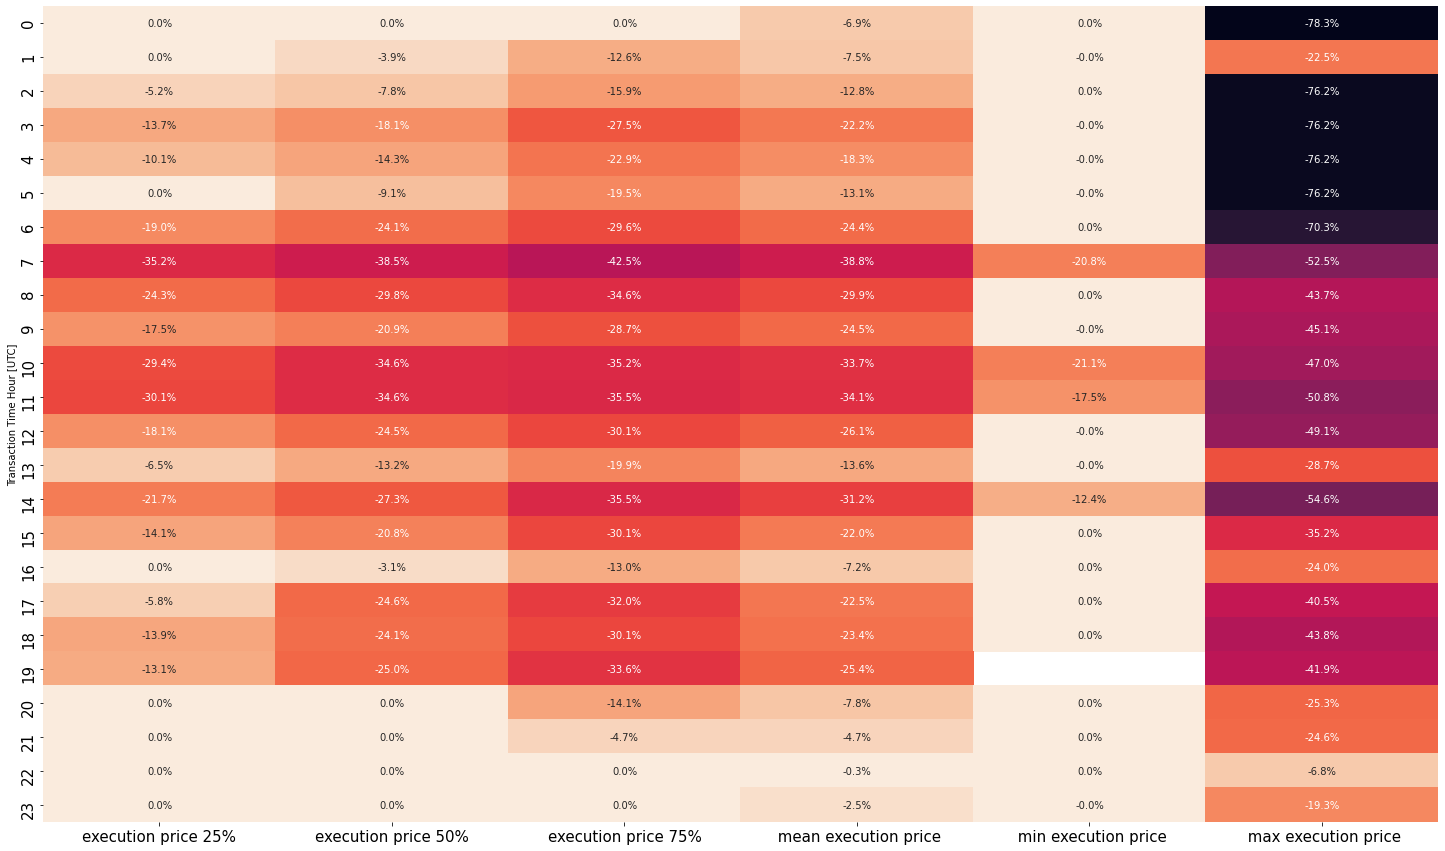

In [185]:
fig, ax = plt.subplots(figsize=(25, 15))
sbn.heatmap((daily_execution_price_stat_marginal-daily_execution_price_stat)/daily_execution_price_stat,
           annot=True,
           fmt=".1%",
           cbar = False)
ax.tick_params(axis='both', which='major', labelsize=15)

Visualize bid-ask spread for the whole day before and after hydro inclusion 

In [188]:
df_updated=update_prices_closed_transactions(df, transactions_update)

In [191]:
starttime="25/04/2019 15:00"
df_validity=hourly_bid_ask_spread(df, starttime)

df_validity_update=hourly_bid_ask_spread(df_updated, starttime, comparison=True)

Hourly total bid ask spread is not strongly affected as it can be predicted. This is mainly due to the fact that the change in price in the window of time does not affect strongly the daily patterns.

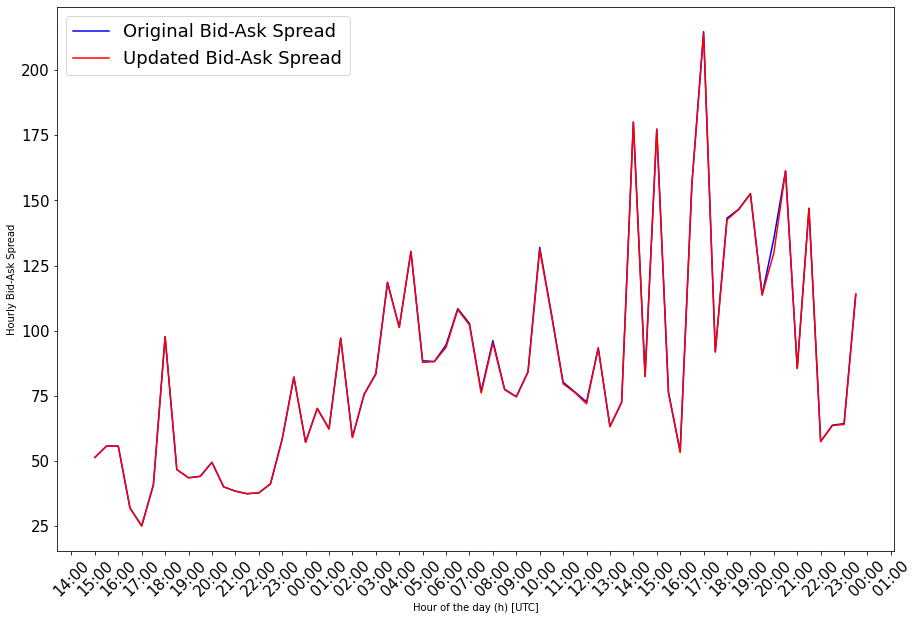

In [238]:
hourly_bid_ask_spread_plot_comparison(df_validity, df_validity_update)

Plotting the price in the time window of interest

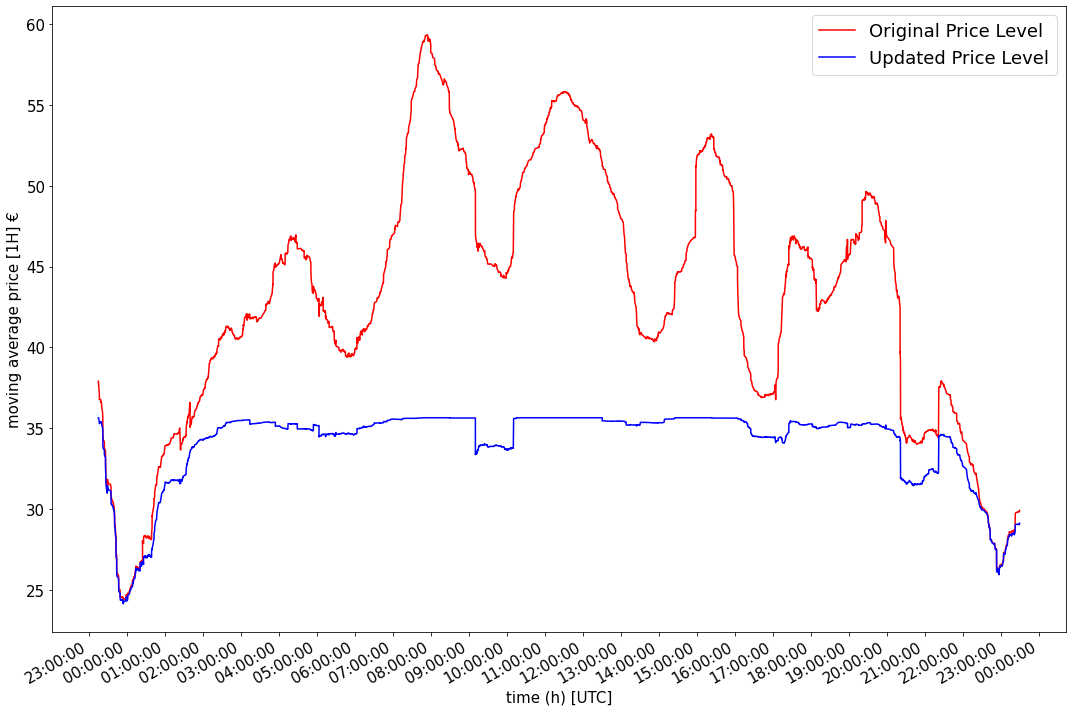

In [24]:
time, outputseries=executed_transactions_time_series(transactions_update, output_series_='moving_avg_exec_price_updated_transactions_comparison')



In [35]:
outputseries

[End Validity Date
 2019-04-25 23:15:10.149000+00:00    37.910000
 2019-04-25 23:15:28.130000+00:00    37.910000
 2019-04-25 23:15:28.130000+00:00    37.906667
 2019-04-25 23:15:28.130000+00:00    37.910000
 2019-04-25 23:15:28.399000+00:00    37.728000
                                       ...    
 2019-04-26 23:29:04.834000+00:00    29.859314
 2019-04-26 23:29:04.947000+00:00    29.866319
 2019-04-26 23:29:04.947000+00:00    29.873571
 2019-04-26 23:29:04.947000+00:00    29.895987
 2019-04-26 23:29:15.576000+00:00    29.920194
 Name: Execution Price, Length: 10035, dtype: float64,
 End Validity Date
 2019-04-25 23:15:10.149000+00:00    35.651908
 2019-04-25 23:15:28.130000+00:00    35.651908
 2019-04-25 23:15:28.130000+00:00    35.651908
 2019-04-25 23:15:28.130000+00:00    35.651908
 2019-04-25 23:15:28.399000+00:00    35.651908
                                       ...    
 2019-04-26 23:29:04.834000+00:00    29.065058
 2019-04-26 23:29:04.947000+00:00    29.074651
 2019-04-26 23

Daily bid and ask spread

In [223]:
starttime="26/04/2019 15:00"

depth=hourly_bid_ask_spread_depth(df, starttime,minute_depth=1)
depth_updated=hourly_bid_ask_spread_depth(df_updated, starttime,minute_depth=1)

In [224]:
ordered_bids_volumes=[x for _,x in sorted(zip(depth[2],depth[3]))]
ordered_bids_prices=sorted(depth[2])

ordered_bids_volumes_updated=[x for _,x in sorted(zip(depth_updated[2],depth_updated[3]))]
ordered_bids_prices_updated=sorted(depth_updated[2])

In [225]:
ordered_ask_volumes=[x for _,x in sorted(zip(depth[0],depth[1]))]
ordered_ask_prices=sorted(depth[0])

ordered_ask_volumes_updated=[x for _,x in sorted(zip(depth_updated[0],depth_updated[1]))]
ordered_ask_prices_updated=sorted(depth_updated[0])

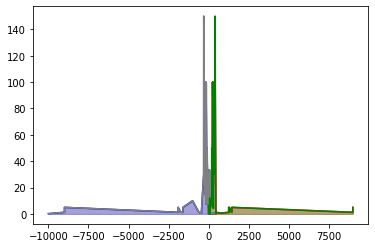

In [228]:
plt.plot(ordered_bids_prices,ordered_bids_volumes, c='blue')
plt.fill_between(ordered_bids_prices, ordered_bids_volumes, color='blue', alpha=0.3)
plt.plot(ordered_ask_prices,ordered_ask_volumes, c='red')
plt.fill_between(ordered_ask_prices, ordered_ask_volumes, color='red', alpha=0.3)

plt.plot(ordered_bids_prices_updated,ordered_bids_volumes_updated, c='grey')
plt.fill_between(ordered_bids_prices_updated, ordered_bids_volumes_updated, color='grey', alpha=0.3)
plt.plot(ordered_ask_prices_updated,ordered_ask_volumes_updated, c='green')
plt.fill_between(ordered_ask_prices_updated, ordered_ask_volumes_updated, color='green', alpha=0.3)